In [ ]:
pip install finterstellar

In [1]:
import finterstellar as fs

In [2]:
df = fs.fn_single(otp='OTP', symbol='UBER', window='T')

In [3]:
df.columns

Index(['Revenue', 'COGS', 'Gross Profit', 'SG&A', 'Operating Income',
       'Net Income', 'EPS', 'EBITDA', 'EBIT', 'Shares', 'Cash & Equivalents',
       'Receivables', 'Current Assets', 'Long Term Assets', 'Total Assets',
       'Current Debt', 'Current Liabilities', 'Long Term Debt',
       'Long Term Liabilities', 'Total Liabilities', 'Shareholders Equity',
       'Depreciation', 'Operating Cash Flow', 'Capital Expenditure',
       'Investing cash flow', 'Dividends', 'Financing cash flow', 'Price'],
      dtype='object')

In [4]:
df['Liability/Equity'] = df['Total Liabilities'] / df['Shareholders Equity']
df['Debt/Equity'] = (df['Long Term Debt']+df['Current Debt']) / df['Shareholders Equity']

In [5]:
print(df[['Liability/Equity', 'Debt/Equity']].tail())

            Liability/Equity  Debt/Equity
2020-06-30              1.86         0.99
2020-09-30              2.09         1.11
2020-12-31              1.59         0.85
2021-03-31              1.51         0.72
2021-06-30              1.45         0.69


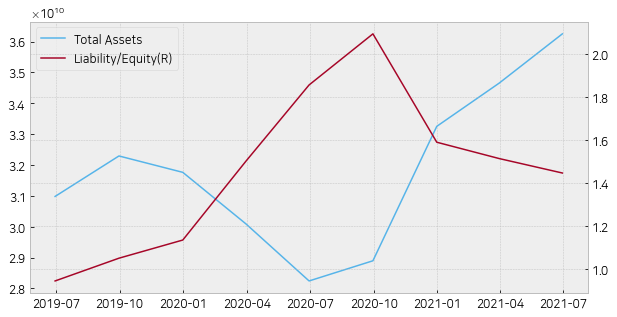

In [6]:
fs.draw_chart(df, left='Total Assets', right='Liability/Equity')

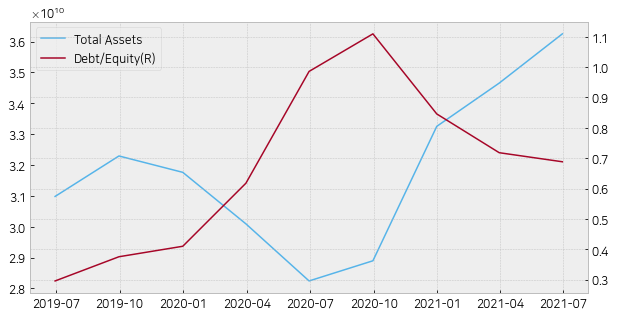

In [7]:
fs.draw_chart(df, left='Total Assets', right='Debt/Equity')

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 6.08%
Accumulated return: 80.54%
Investment period: 10.0yrs
Sharpe ratio: 0.36
MDD: -26.60%


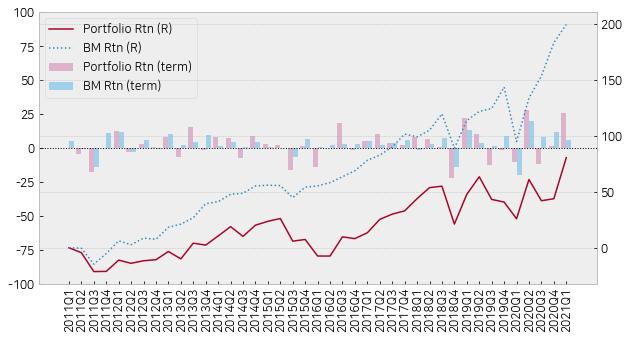

In [8]:
# Liability/Equity
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    s[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=30, asc=True)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [9]:
# PER
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    s[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, n=30, asc=True) 
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 12.35%
Accumulated return: 220.78%
Investment period: 10.0yrs
Sharpe ratio: 0.70
MDD: -40.75%


In [10]:
# PER + Liability/Equity
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s = {}
signal = {}
for t in terms:
    data[t]['PER'] = data[t]['Price_M3'] / data[t]['EPS']
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    s1[t] = fs.fn_filter(data[t], by='PER', floor=1, cap=10, asc=True)    
    s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
    s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 4.66%
Accumulated return: 57.75%
Investment period: 10.0yrs
Sharpe ratio: 0.19
MDD: -59.20%


In [11]:
# PBR
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    s[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, n=30, asc=True) 
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)

CAGR: 22.70%
Accumulated return: 674.50%
Investment period: 10.0yrs
Sharpe ratio: 1.82
MDD: -37.03%


CAGR: 17.19%
Accumulated return: 389.09%
Investment period: 10.0yrs
Sharpe ratio: 0.94
MDD: -45.21%


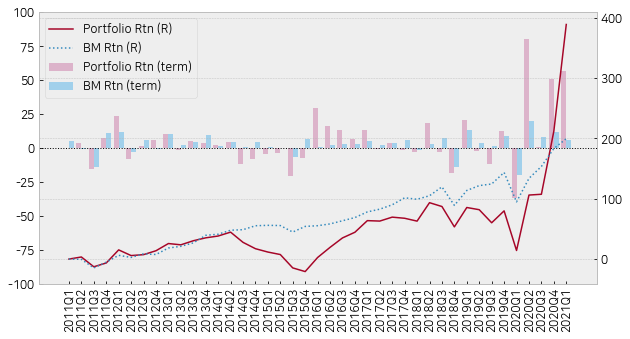

In [12]:
# PBR + Liability/Equity
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s1 = {}
s2 = {}
s = {}
signal = {}
for t in terms:
    data[t]['PBR'] = data[t]['Price_M3'] / (data[t]['Shareholders Equity']/data[t]['Shares'])
    data[t]['Liability/Equity'] = data[t]['Total Liabilities'] / data[t]['Shareholders Equity']
    data[t].loc[(data[t]['Shareholders Equity']<0), 'Liability/Equity'] = float('nan')
    s1[t] = fs.fn_filter(data[t], by='PBR', floor=.1, cap=1, asc=True)    
    s2[t] = fs.fn_filter(data[t], by='Liability/Equity', floor=0, n=1000, asc=True)
    s[t] = fs.combine_signal(s1[t], s2[t], how='and', n=30)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)